In [1]:
import sys
import importlib
import os

parent_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_path not in sys.path:
    sys.path.insert(0, parent_path)

import utils
importlib.reload(utils)
from utils import *

import files
importlib.reload(files)
from files import *

In [2]:
Text_combined_tou = pd.concat([Text_agen, Text_albi,Text_auch,Text_toulouse], axis=0).reset_index(drop=True)
occupation=extract_columns("../data/simulation_data/Occupancy_per_hour",1).reset_index(drop=True)  
Text_occ_agen = pd.concat([Text_agen,occupation],axis=1).reset_index(drop=True)
Text_occ_albi = pd.concat([Text_albi,occupation],axis=1).reset_index(drop=True)
Text_occ_auch = pd.concat([Text_auch,occupation],axis=1).reset_index(drop=True)
Text_occ_toulouse = pd.concat([Text_toulouse,occupation],axis=1).reset_index(drop=True)
Text_occ_combined_tou = pd.concat([Text_occ_agen, Text_occ_albi,Text_occ_auch,Text_occ_toulouse], axis=0).reset_index(drop=True)

In [3]:
Hum_combined_tou = pd.concat([hum_agen, hum_albi,hum_auch,hum_toulouse], axis=0).reset_index(drop=True)
Wind_combined_tou=pd.concat([wind_agen, wind_albi,wind_auch,wind_toulouse], axis=0).reset_index(drop=True)


In [28]:
Text_Wind_Solar_Ground_conso_heat_tou=pd.concat([Text_combined_tou], axis=1).reset_index(drop=True)
Text_Wind_Solar_Ground_conso_heat_tou.columns = Text_Wind_Solar_Ground_conso_heat_tou.columns.astype(str)

In [29]:
Text_Wind_Solar_Ground_conso_heat_tou['heat_on'] = conso_tou['heat_on']
Text_Wind_Solar_Ground_conso_heat_tou['clusters'] = conso_tou['clusters']
Text_Wind_Solar_Ground_conso_heat_tou.columns = Text_Wind_Solar_Ground_conso_heat_tou.columns.astype(str)

In [30]:
X = Text_Wind_Solar_Ground_conso_heat_tou.drop(columns=["clusters"])
y = Text_Wind_Solar_Ground_conso_heat_tou["clusters"]

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)



In [32]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, f1_score, precision_score, 
    recall_score, classification_report, balanced_accuracy_score
)
import time
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_models_split(X_train, X_test, y_train, y_test, models):
    """
    Évalue plusieurs modèles en utilisant un train_test_split.
    Calcule accuracy, F1-score (weighted/macro), precision, recall, 
    balanced accuracy et temps d'exécution. Affiche aussi la matrice de confusion.
    """
    results = {}
    for name, model in models.items():
        print(f"\nÉvaluation de {name} avec train_test_split...")
        start_time = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        execution_time = time.time() - start_time
        
        cm = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        f1_weighted = f1_score(y_test, y_pred, average='weighted')
        f1_macro = f1_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        balanced_acc = balanced_accuracy_score(y_test, y_pred)

        results[name] = {
            "accuracy": accuracy,
            "f1_weighted": f1_weighted,
            "f1_macro": f1_macro,
            "precision": precision,
            "recall": recall,
            "balanced_accuracy": balanced_acc,
            "execution_time (s)": execution_time
        }

        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=model.classes_, yticklabels=model.classes_)
        plt.xlabel('Prédictions')
        plt.ylabel('Vraies classes')
        plt.title(f'Matrice de confusion - {name}')
        plt.show()

        print(f"{name} - Accuracy: {accuracy:.4f} | F1(w): {f1_weighted:.4f} | F1(macro): {f1_macro:.4f}")
        print(f"Precision: {precision:.4f} | Recall: {recall:.4f} | Balanced Acc: {balanced_acc:.4f}")
        print(f"Temps d'exécution: {execution_time:.4f} sec")
        print("###################################################################")
    
    return results



Évaluation de Random Forest avec train_test_split...


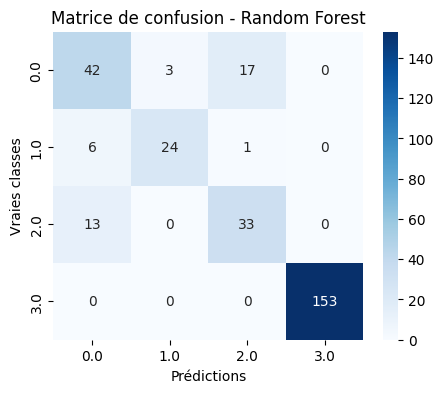

Random Forest - Accuracy: 0.8630 | F1(w): 0.8640 | F1(macro): 0.7977
Precision: 0.8665 | Recall: 0.8630 | Balanced Acc: 0.7923
Temps d'exécution: 0.4405 sec
###################################################################

Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


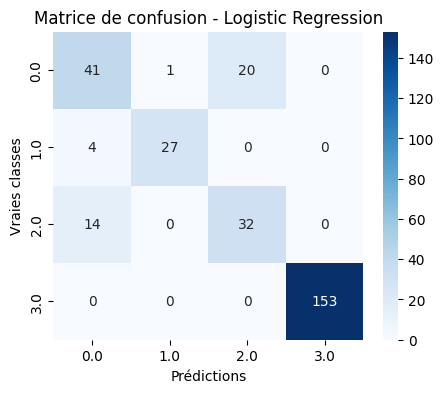

Logistic Regression - Accuracy: 0.8664 | F1(w): 0.8679 | F1(macro): 0.8115
Precision: 0.8708 | Recall: 0.8664 | Balanced Acc: 0.8070
Temps d'exécution: 0.4879 sec
###################################################################

Évaluation de SVC avec train_test_split...


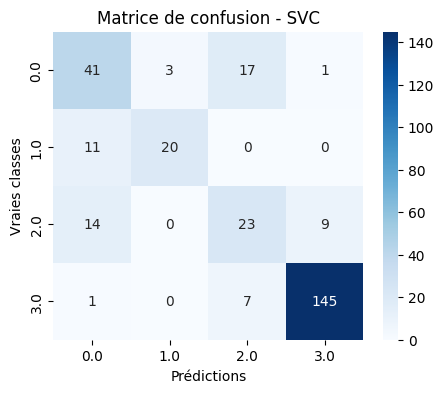

SVC - Accuracy: 0.7842 | F1(w): 0.7849 | F1(macro): 0.7031
Precision: 0.7895 | Recall: 0.7842 | Balanced Acc: 0.6885
Temps d'exécution: 0.0732 sec
###################################################################

Évaluation de KNN avec train_test_split...


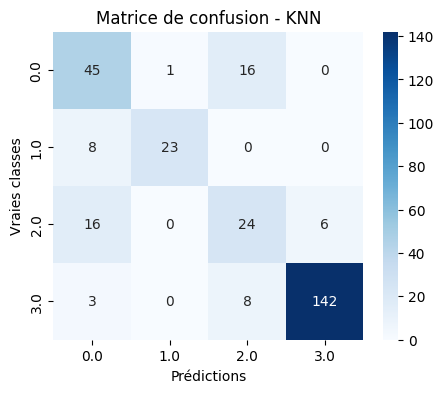

KNN - Accuracy: 0.8014 | F1(w): 0.8062 | F1(macro): 0.7405
Precision: 0.8159 | Recall: 0.8014 | Balanced Acc: 0.7294
Temps d'exécution: 0.0318 sec
###################################################################

Évaluation de Gradient Boosting avec train_test_split...


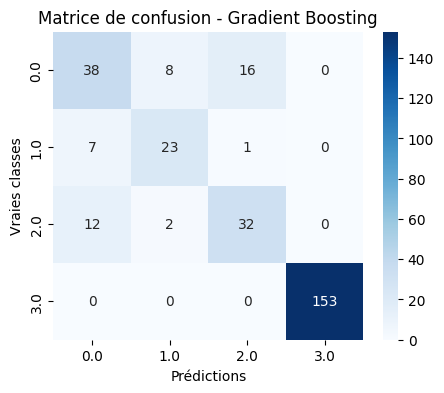

Gradient Boosting - Accuracy: 0.8425 | F1(w): 0.8420 | F1(macro): 0.7578
Precision: 0.8424 | Recall: 0.8425 | Balanced Acc: 0.7626
Temps d'exécution: 4.0700 sec
###################################################################


In [33]:
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [26]:
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, 
    balanced_accuracy_score
)
from sklearn.model_selection import StratifiedKFold, cross_val_score
import time
import numpy as np

def evaluate_models_cv(X, y, models, cv=4):
    """
    Évalue plusieurs modèles en utilisant la validation croisée (cross-validation).
    Pour chaque modèle, cette fonction calcule la précision (accuracy), le F1-score, 
    la précision, le rappel, et l'accuracy équilibrée, avec un nombre défini de plis (folds).
    Elle calcule également le temps d'exécution.
    """
    
    results = {}
    for name, model in models.items():
        print(f"\nÉvaluation de {name} avec Cross Validation ({cv}-folds)...")  
        start_time = time.time()

        # Définir les scores à calculer
        scoring = ["accuracy", "f1_weighted", "precision_weighted", "recall_weighted", "balanced_accuracy"]
        scores = {}

        for metric in scoring:
            score = cross_val_score(model, X, y, cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42), scoring=metric)
            scores[metric] = np.mean(score)

        execution_time = time.time() - start_time
        results[name] = scores
        results[name]["execution_time (s)"] = execution_time
        
        print(f"{name} - Accuracy: {scores['accuracy']:.4f} - F1 Score: {scores['f1_weighted']:.4f}")
        print(f"Precision: {scores['precision_weighted']:.4f} | Recall: {scores['recall_weighted']:.4f} | Balanced Accuracy: {scores['balanced_accuracy']:.4f}")
        print(f"Temps d'exécution: {execution_time:.4f} sec")
        print("###################################################################")
    
    return results


In [27]:
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)


Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.8671 - F1 Score: 0.8672
Precision: 0.8707 | Recall: 0.8671 | Balanced Accuracy: 0.7748
Temps d'exécution: 9.9988 sec
###################################################################

Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.8829 - F1 Score: 0.8829
Precision: 0.8847 | Recall: 0.8829 | Balanced Accuracy: 0.8028
Temps d'exécution: 1.3957 sec
###################################################################

Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8760 - F1 Score: 0.8767
Precision: 0.8834 | Recall: 0.8760 | Balanced Accuracy: 0.7809
Temps d'exécution: 0.9353 sec
###################################################################

Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.8342 - F1 Score: 0.8348
Precision: 0.8421 | Recall: 0.8342 | Balanced Accuracy: 0.7238
Temps d'exécution: